# Inverse transform sampling method - continuous

### ex 1

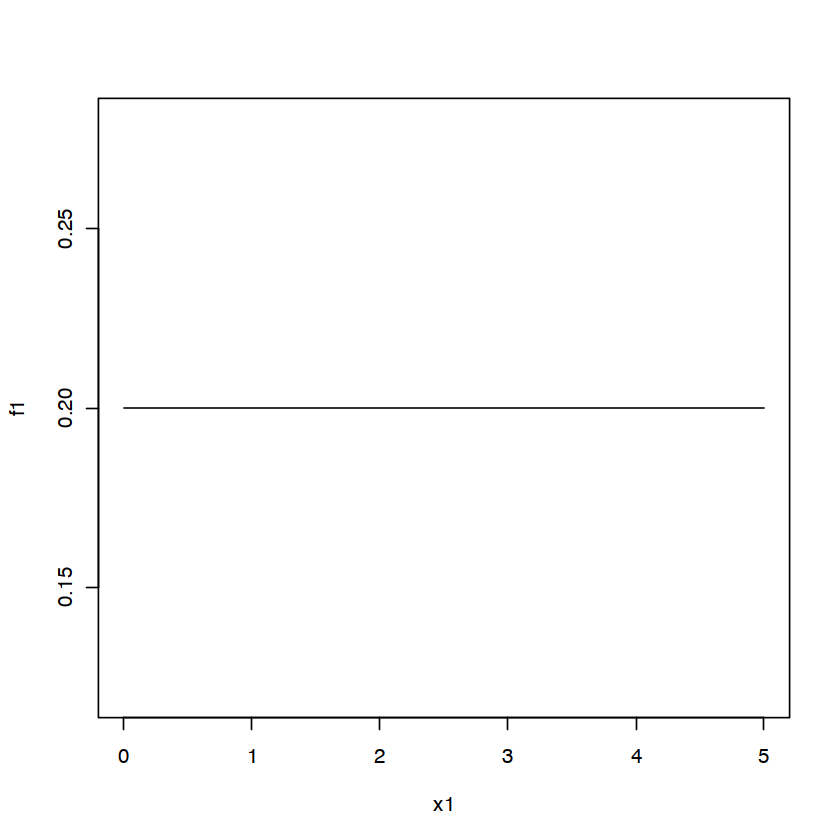

In [5]:
a <- 0
b <- 5
x1 <- a:b
f1 <- dunif(x1, a, b)
plot(x1, f1, type = 'l')

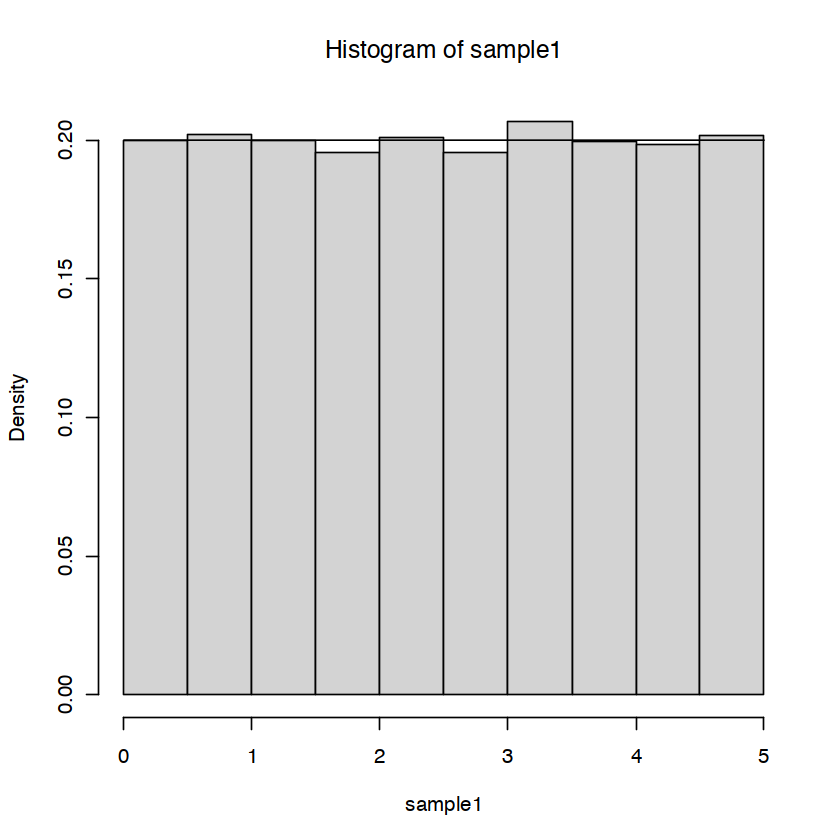

In [24]:
u1 <- runif(10^4, 0, 1)
sample1 <- a + u1*(b-a)
hist(sample1, freq = FALSE)
lines(x1, f1)

### ex 2


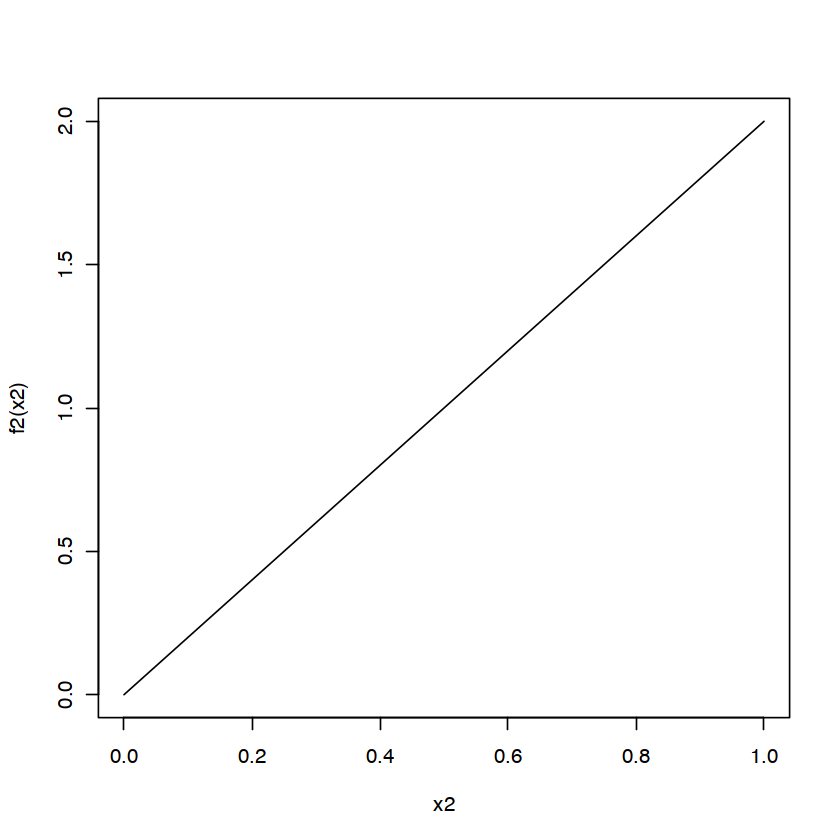

In [21]:
x2 <- seq(0, 1, 0.01)
f2 <- function(x) 2 * x
plot(x2, f2(x2), type = 'l')

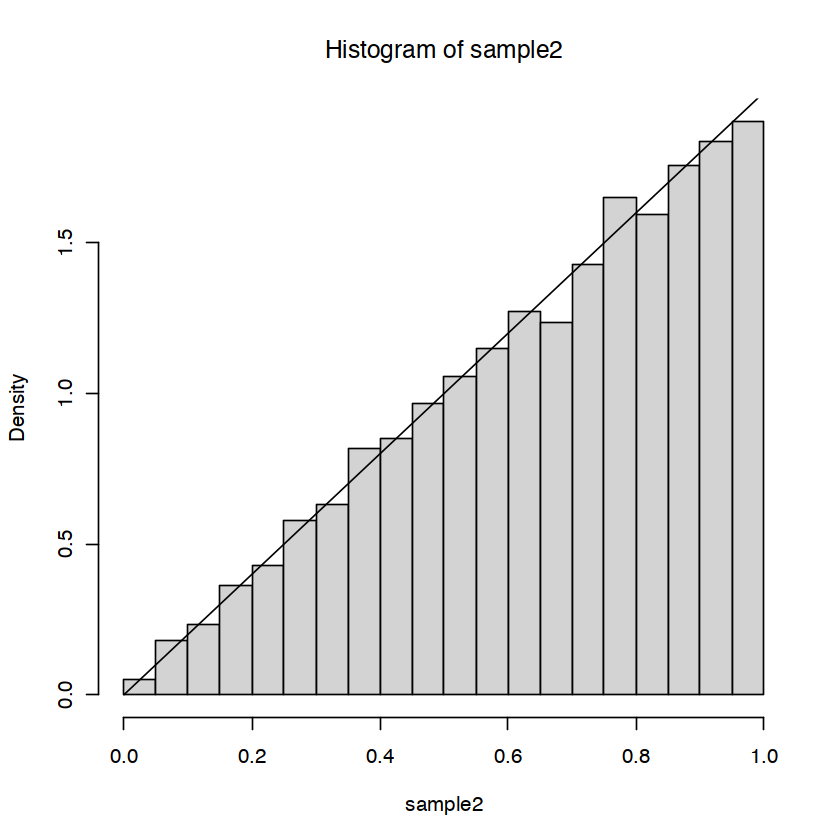

In [23]:
u2 <- runif(10^4, 0, 1)
sample2 <- sqrt(u2)
hist(sample2, freq = FALSE)
lines(x2, f2(x2))

### ex 3

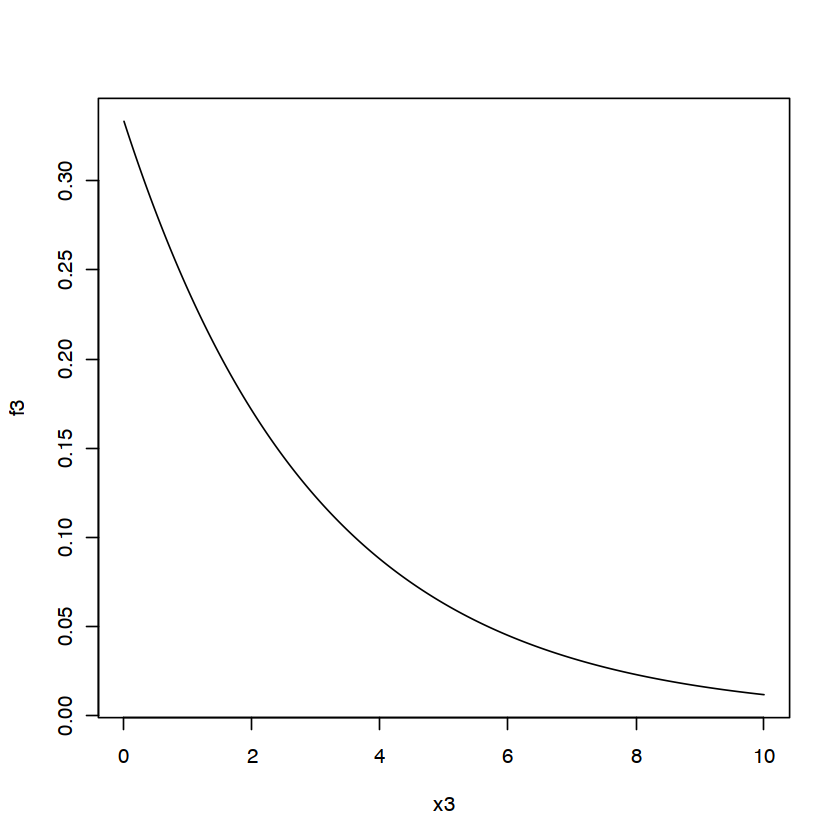

In [27]:
x3 <- seq(0, 10, 0.01)
lambda <- 1/3
f3 <- dexp(x3, lambda)
plot(x3, f3, type = 'l')

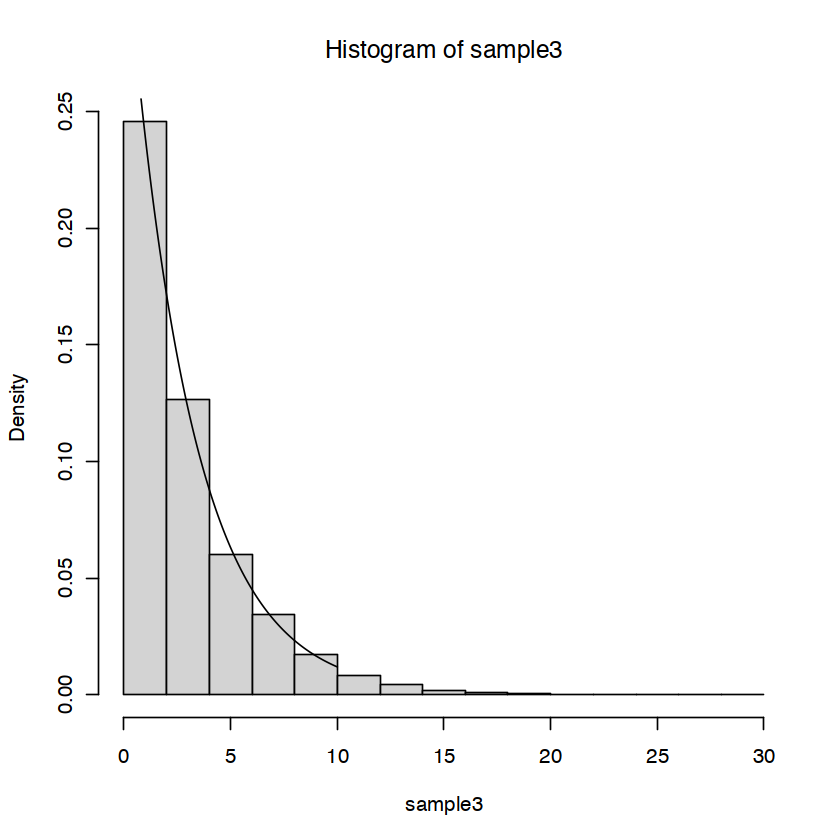

In [28]:
u3 <- runif(10^4, 0, 1)
sample3 <- - 1/lambda * log(u3)
hist(sample3, freq = FALSE)
lines(x3, f3)

# Inverse transform sampling method - discrete

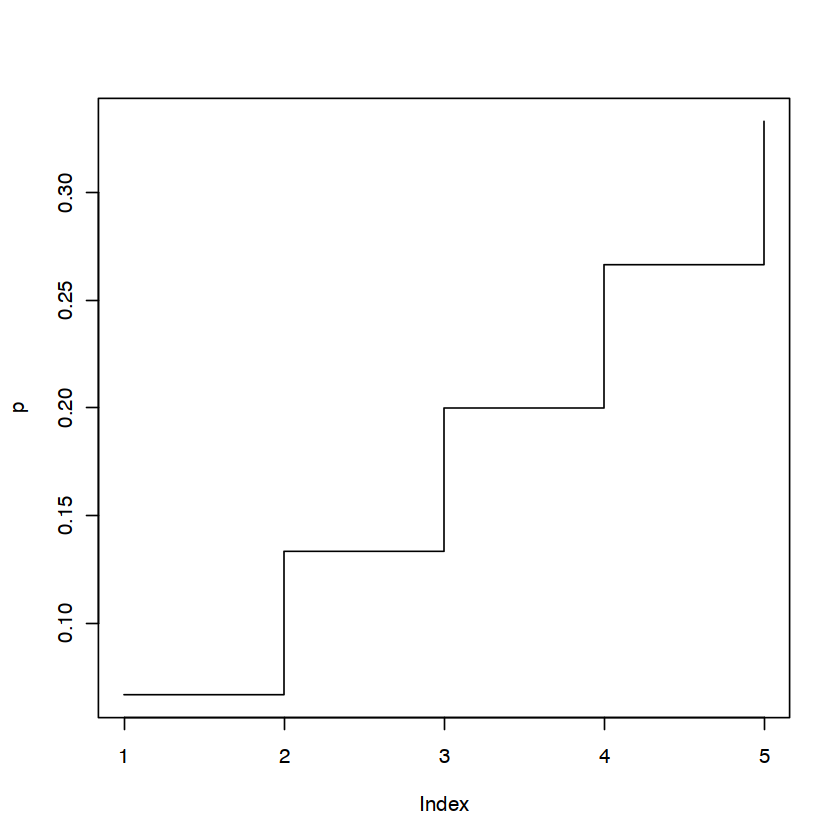

In [118]:
k <- 1:5
p <- k/15
plot(p, type = 's')

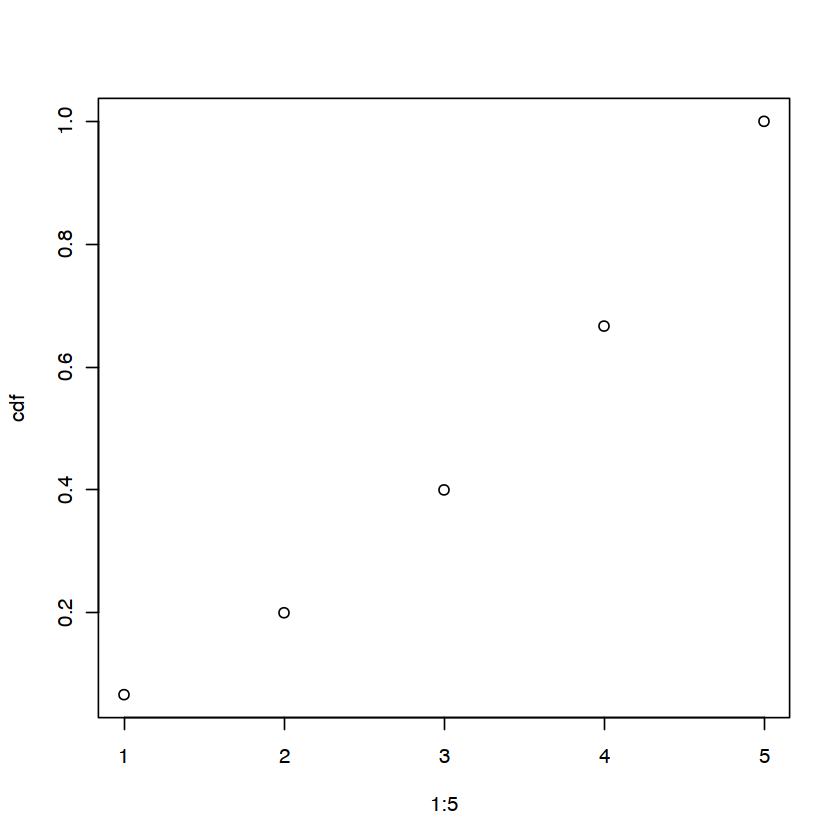

In [127]:

    cdf <- rep(p[1], length(p))
    for(i in 1:(length(p)-1)){
        cdf[i + 1] <- p[i+1] + cdf[i]
    }

plot(1:5, cdf)

In [128]:
print(k)
print(cdf)

[1] 1 2 3 4 5
[1] 0.06666667 0.20000000 0.40000000 0.66666667 1.00000000


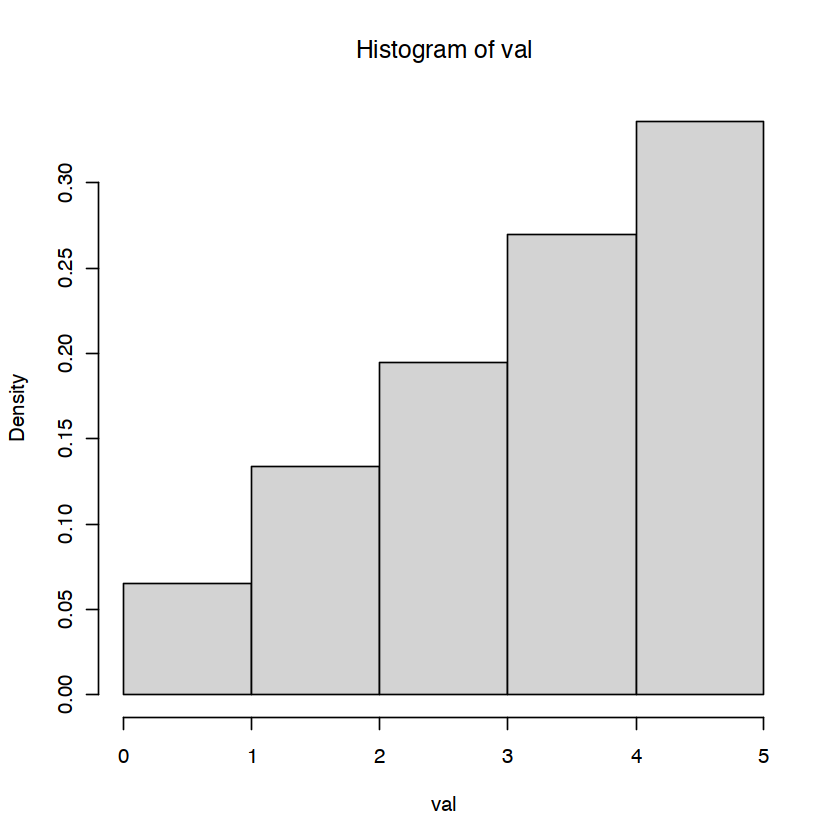

In [139]:
u <- runif(10^4)
val <- rep(0, length(u))
for (j in 1:length(u)){
    val[j] <- min(k[cdf >= u[j]]) 
}

hist(val, freq=FALSE, breaks = 0:5)



# acceptance/rejection method

In [152]:
f <- function(x) {6*(x-1)*(2-x)}
a <- 1; b<- 2
n <- 10^4
x <- seq(1, 2, 0.01)

u1 <- runif(n)
x1 <- a + (b-a)*u1
f1 <- f(x1)

u2 <- runif(n)
M <- 1.5

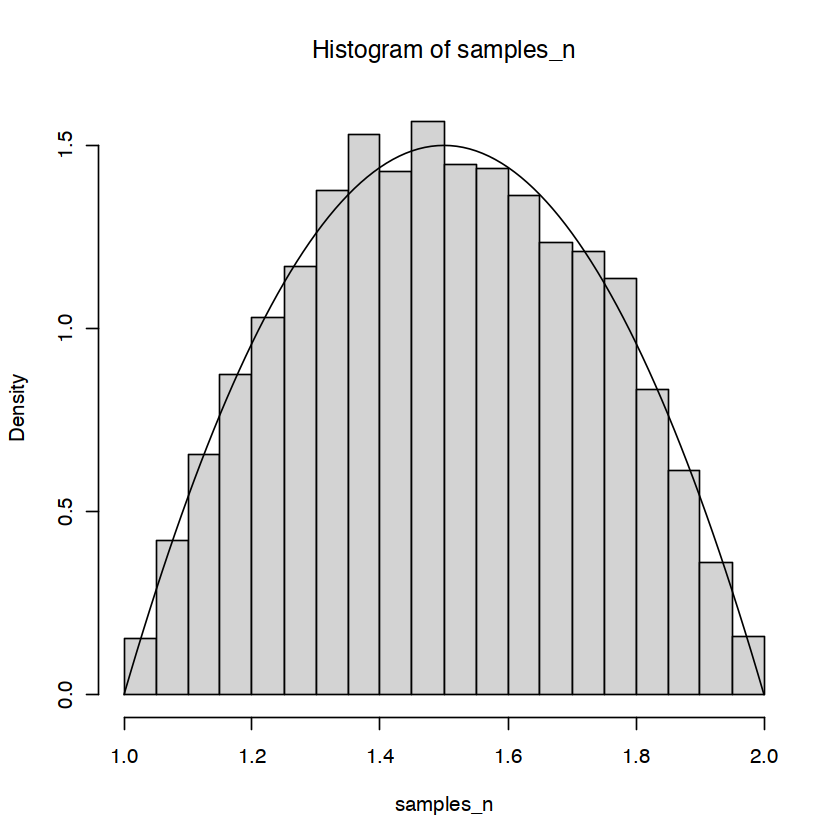

In [159]:
samples <- ifelse(f1 > M * u2, x1, NA)
samples_n <- samples[!is.na(samples)]
hist(samples_n, breaks = seq(1, 2, 0.05), freq = FALSE)
lines(x, f(x))

# Bayesian model comparison

In [160]:
T_given_D <- seq(0, 1, 0.01)
T_given_not_D <- 0.07
D <- 0.008
not_D <- 1 - D

In [161]:
odd_ratio <- T_given_D * D / (T_given_not_D * not_D)
D_given_T <- 1/(1 + 1/odd_ratio)

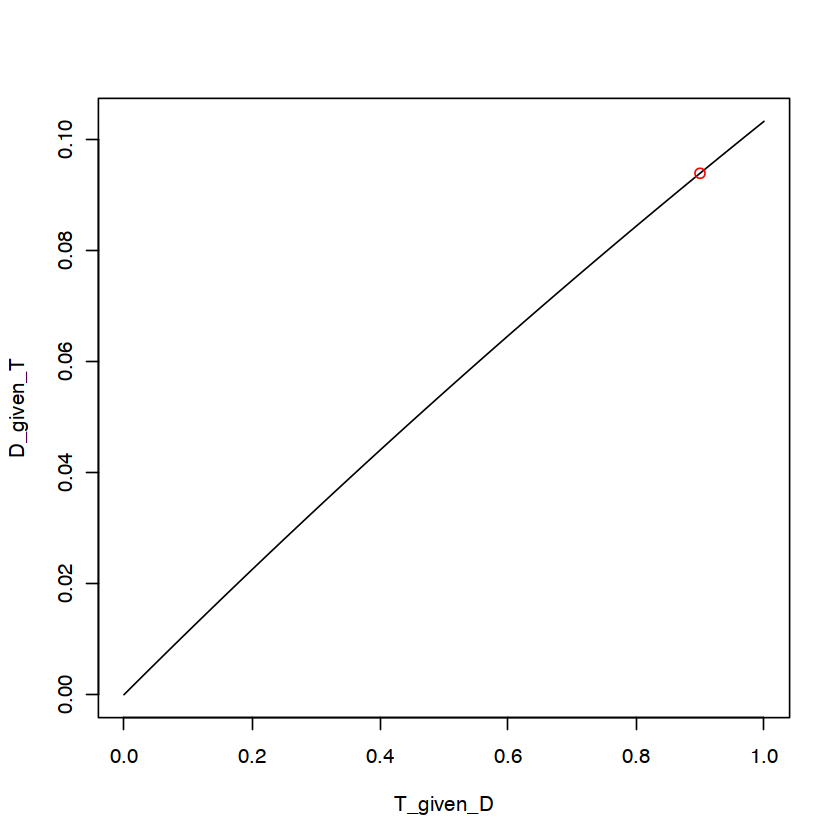

In [165]:
plot(T_given_D, D_given_T, type = 'l')
points(0.9, D_given_T[T_given_D == 0.9], col = 'red')

# Survey for the next uni elections

In [171]:
p <- seq(0, 1, 0.001)
posterior <- dbeta(p, 26.2, 74.8)
cumul <- pbeta(p, 26.2, 74.8)

#for(i in 1:length(p)){
    min <- max(p[cumul <= 0.025])
    max <- min(p[cumul >= 0.975])
    print(min)
    print(max)
#}

[1] 0.179
[1] 0.349


In [173]:
integrate(function(p) dbeta(p, 26.2, 74.8)*p, 0, 1)

0.2594059 with absolute error < 2.3e-08